In [1]:
import os
import lephare as lp
import numpy as np
from matplotlib import pylab as plt
import struct

%matplotlib inline

Lephare default working directory already exists at
                    /Users/rshirley/Library/Caches/lephare/work.


In [2]:
lp.DataManager.get_auxiliary_data(lp.LEPHAREDIR)

Data appears present


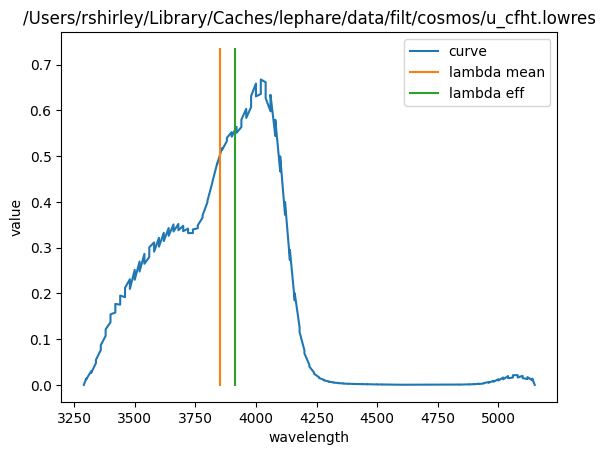

In [3]:
filter_name = "cosmos/u_cfht.lowres"
f1 = lp.flt(0, filter_name, 1, 0)
f1.read(os.path.join(lp.LEPHAREDIR, "filt", filter_name))
f1.plot_filter_curve()

In [4]:
config_file = f"{lp.LEPHAREDIR}/examples/COSMOS.para"
filter_driver = lp.Filter(config_file=config_file)
filter_driver.run()

# NAME                        IDENT      Lbda_mean Lbeff(Vega)       FWHM     AB-cor    TG-cor      VEGA M_sun(AB)   CALIB      Lb_eff    Fac_corr
u_cfht.lowres                 1             0.3852      0.3914      0.0497    0.3015   -0.3939  -20.6252    6.0220       0      0.3823      1.0000
u_new.pb                      2             0.3695      0.3754      0.0414    0.6072   -0.2801  -20.8437    6.3096       0      0.3673      1.0000
gHSC.pb                       3             0.4867      0.4778      0.1090   -0.0838   -0.2382  -20.7373    5.0673       0      0.4798      1.0000
rHSC.pb                       4             0.6257      0.6158      0.1526    0.1498    0.2628  -21.5230    4.6501       0      0.6194      1.0000
iHSC.pb                       5             0.7729      0.7649      0.1477    0.3962    0.6163  -22.2342    4.5318       0      0.7679      1.0000
zHSC.pb                       6             0.8918      0.8910      0.0767    0.5167    0.7622  -22.6738    4.5147    

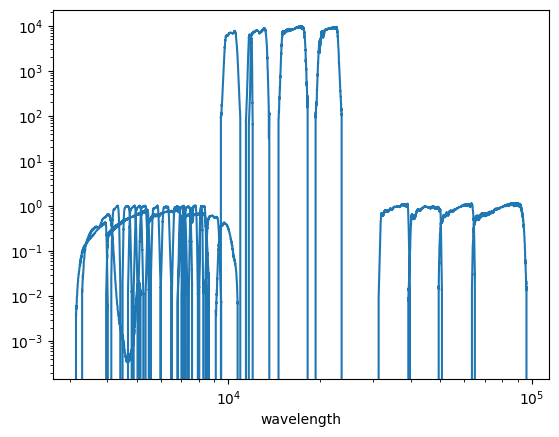

In [5]:
filter_output = os.path.join(
    os.environ["LEPHAREWORK"], "filt", filter_driver.keymap["FILTER_FILE"].value + ".dat"
)
filters = np.loadtxt(filter_output, dtype={"names": ("lamb", "val", "bid"), "formats": (float, float, int)})
plt.loglog(filters["lamb"], filters["val"])
plt.xlabel("wavelength");

# Manipulating a SED object

SED objects represent SED templates belonging to one of the three possible classes "STAR", "QSO" (for AGN type of objects), and "GAL" for galaxies. SED templates available with LePhare can be found under the `sed` directory. 

In [6]:
!ls $LEPHAREDIR/sed

GAL  QSO  STAR


Let's start with the template of a star. A SED object is created most easily with 3 arguments: its name, an identifying integer, and the type it belongs to. Then calling the `read` function reads the ASCII file passed as argument.

In [7]:
star_sed = "f2ii.sed"
sed_filename = os.path.join(lp.LEPHAREDIR, "sed/STAR/PICKLES/", star_sed)
sed = lp.StarSED(star_sed, 1)
sed.read(sed_filename)

The python code exposes the templates vectors through the `data` method

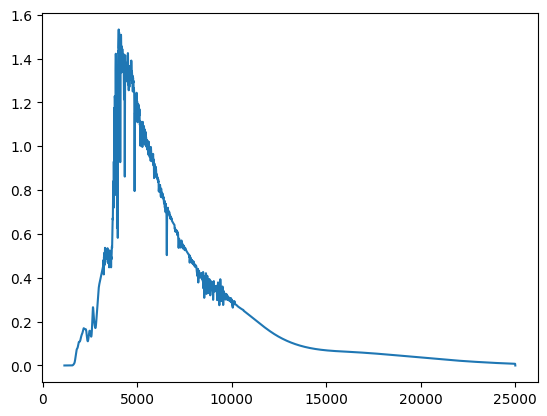

In [8]:
x = sed.data()[0]
y = sed.data()[1]
plt.plot(x, y)

In the context of LePhare, such a SED object is going to be written as a byte compressed file, and read back downstream to compute expected magnitudes and to perform the fit. Writing an reading this binary stored file goes as follows:

In [9]:
rootname = star_sed.split(".")[0]
sed.writeSED(rootname + ".bin", rootname + ".phys", rootname + ".doc")

We can read it back into a new SED object, and check that the values have been correctly read back

In [10]:
sed2 = lp.StarSED(star_sed, 2)
sed2.readSEDBin(rootname + ".bin")
x2 = sed.data()[0]
y2 = sed.data()[1]
assert np.all(x == x2)
assert np.all(y == y2)
print(sed.name, sed2.name)

f2ii.sed MOD_1


In [11]:
config_file = "./data/COSMOS.para"
sed = lp.Sedtolib(config_file)
sed.run(typ="STAR", star_sed=f"{lp.LEPHAREDIR}/sed/STAR/STAR_MOD_ALL.list", star_fscale="1")

#######################################
# It s translating SEDs to binary library #
# with the following options :           
# Config file     : ./data/COSMOS.para
# Library type     : STAR
# STAR_SED    :/Users/rshirley/Library/Caches/lephare/data/sed/STAR/STAR_MOD_ALL.list
# STAR_LIB    :LIB_STAR
# STAR_LIB doc:/Users/rshirley/Library/Caches/lephare/work/lib_bin/LIB_STAR.doc
# STAR_FSCALE :1.0000
#######################################
Number of SED in the list 254


In [12]:
sed_output = os.path.join(
    os.environ["LEPHAREWORK"], "lib_bin", filter_driver.keymap["STAR_LIB"].value + ".bin"
)

In [13]:
sed_output

'/Users/rshirley/Library/Caches/lephare/work/lib_bin/LIB_STAR.bin'

In [14]:
# Code to unpack binary not running
# buf = open(sed_output, "rb").read()
# counter = 0
# off = 0
# while counter <= 0:
#     nrec, jtype, nbw = struct.unpack("iil", buf[off : off + 16])
#     wave = struct.unpack("d" * nbw, buf[off + 16 : off + 16 + 8 * nbw])
#     print(nrec, jtype, nbw)
#     off += 16 + 8 * nbw
#     nrec, jtype, nbw = struct.unpack("iil", buf[off : off + 16])
#     spec = struct.unpack("d" * nbw, buf[off + 16 : off + 16 + 8 * nbw])
#     print(nrec, jtype, nbw)
#     off += 16 + 8 * nbw
#     counter += 1
# plt.plot(wave, spec)
# # plt.xlim(1000,1.e4)
# # plt.ylim(1.e-10,1.e-6)

# n = 6973
# struct.unpack("d", buf[off + 16 + 8 * (n - 1) : off + 16 + 8 * n])

# nbw

# buf[38896 + 16 + 8 : 38896 + 16 + 16]

# struct.unpack("d", buf[38896 + 16 + 8 : 38896 + 16 + 16])

# print(4.2399775704000006e-08 / 1.23542470e01)

# struct.unpack("d" * 1, buf[off + 16 : off + 16 + 8])

# struct.calcsize("l")

# wave[1], spec[1]

1 4860 0


error: unpack requires a buffer of 8666464256 bytes

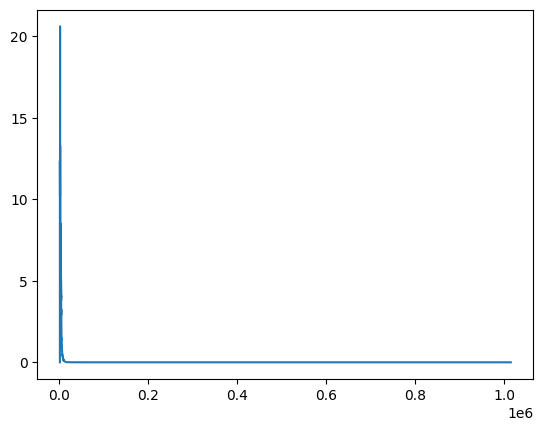

In [15]:
d = np.loadtxt(f"{lp.LEPHAREDIR}/sed/STAR/PICKLES/o5v.sed.ext")
plt.plot(d[:, 0], d[:, 1])

In [16]:
d[:, 1]

array([0.00000000e+00, 1.23542470e+01, 9.92826800e+00, ...,
       2.15824600e-65, 4.93845048e-66, 1.13000525e-66])

In [17]:
stream_buf = open(sed_output, "rb").read()

In [18]:
struct.unpack("iil", stream_buf[0:16])

(1, 4860, 0)

In [19]:
k = lp.keyword("TEST", "0.1,0.1,6")
print(k.split_double("0.03", 3))
print(k.split_double("0.03", 3))

[0.1, 0.1, 6.0]
[0.1, 0.1, 6.0]


In [20]:
mag = lp.MagGal(config_file)
mag.run(typ="STAR", lib_ascii="YES", star_lib_out="ALLSTAR_COSMOS")

 All files opened 
#######################################
# It s computing the SYNTHETIC MAGNITUDES #
# For Gal/QSO libraries with these OPTIONS #
# with the following options :           
# Config file     : ./data/COSMOS.para
# Filter file     : filter_cosmos
# Magnitude type     : AB
# COSMOLOGY   :70.0000,0.3000,0.7000
# STAR_LIB_IN    :/Users/rshirley/Library/Caches/lephare/work/lib_bin/LIB_STAR(.doc & .bin)
# STAR_LIB_OUT   :/Users/rshirley/Library/Caches/lephare/work/lib_mag/ALLSTAR_COSMOS(.doc & .bin)
# LIB_ASCII   YES
# CREATION_DATE Wed Apr  3 21:51:25 2024
#############################################


In [21]:
sed.run(typ="QSO", qso_sed=f"{lp.LEPHAREDIR}/sed/QSO/SALVATO09/AGN_MOD.list")

#######################################
# It s translating SEDs to binary library #
# with the following options :           
# Config file     : ./data/COSMOS.para
# Library type     : QSO
# QSO_SED    :/Users/rshirley/Library/Caches/lephare/data/sed/QSO/SALVATO09/AGN_MOD.list
# QSO_LIB    :LIB_QSO
# QSO_LIB doc:/Users/rshirley/Library/Caches/lephare/work/lib_bin/LIB_QSO.doc
# QSO_FSCALE :1.0000
#######################################
Number of SED in the list 14


In [24]:
sed.run(typ="GAL", gal_sed=f"{lp.LEPHAREDIR}/examples/COSMOS_MOD.list", gal_lib="LIB_VISTA")

#######################################
# It s translating SEDs to binary library #
# with the following options :           
# Config file     : ./data/COSMOS.para
# Library type     : GAL
# GAL_SED    :/Users/rshirley/Library/Caches/lephare/data/examples/COSMOS_MOD.list
# GAL_LIB    :LIB_VISTA
# GAL_LIB doc:/Users/rshirley/Library/Caches/lephare/work/lib_bin/LIB_VISTA.doc
# GAL_LIB phys:/Users/rshirley/Library/Caches/lephare/work/lib_bin/LIB_VISTA.phys
# SEL_AGE    :none
# GAL_FSCALE :1.0000
# AGE_RANGE   0.0000 15000000000.0000
#######################################
Number of SED in the list 31


In [25]:
mag = lp.MagGal(config_file)
mag.run(
    typ="QSO",
    lib_ascii="NO",
    mod_extinc="0,1000",
    eb_v="0.,0.1,0.2,0.3",
    extinc_law="SB_calzetti.dat",
    z_step="0.04,0,6",
)

 All files opened 
#######################################
# It s computing the SYNTHETIC MAGNITUDES #
# For Gal/QSO libraries with these OPTIONS #
# with the following options :           
# Config file     : ./data/COSMOS.para
# Filter file     : filter_cosmos
# Magnitude type     : AB
# QSO_LIB_IN    :/Users/rshirley/Library/Caches/lephare/work/lib_bin/LIB_QSO(.doc & .bin)
# QSO_LIB_OUT   :/Users/rshirley/Library/Caches/lephare/work/lib_mag/QSO_COSMOS(.doc & .bin)
# ZGRID_TYPE   :0
# Z_STEP   :0.0400 0.0000 6.0000
# COSMOLOGY   :70.0000,0.3000,0.7000
# EXTINC_LAW   :SB_calzetti.dat 
# MOD_EXTINC   :0 1000 
# EB_V   :0.0000 0.1000 0.2000 0.3000 # LIB_ASCII   NO
# CREATION_DATE Wed Apr  3 21:53:13 2024
#############################################
